In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import load_model
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [2]:
model = load_model("C:/Users/ROG/Prediction for Brain Age/model_20211229.h5")

In [3]:
model

In [4]:
train_image = []
for i in tqdm(range(0, 4)):
    img = image.load_img('C:/Users/ROG/Prediction for Brain Age/Phyo new Model pictures/%d.png' %i, target_size=(160,160,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 4/4 [00:00<00:00, 137.94it/s]


In [5]:
# model.predict(X)
print(X[0].shape)

(160, 160, 3)


In [6]:
def pred(image):
    image = image[:, :, :, 0] * 299/1000 + image[:, :, :, 1] * 587/1000 + image[:, :, :, 2] * 114/1000
    print(image.shape)
    return model.predict(image)

In [7]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(X[0].astype('double'), pred, top_labels=5, hide_color=0, num_samples=1000)

(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 

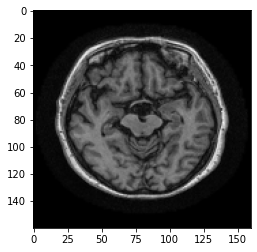

In [8]:
plt.imshow(X[0])

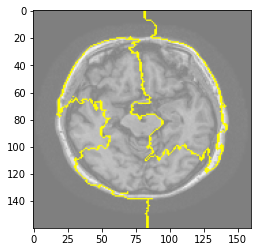

In [9]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

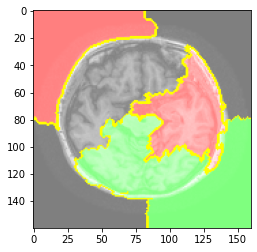

In [10]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

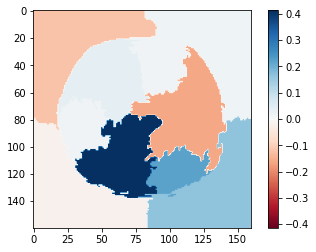

In [11]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [13]:
explanation = explainer.explain_instance(X[1].astype('double'), pred, top_labels=5, hide_color=0, num_samples=1000)

(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 

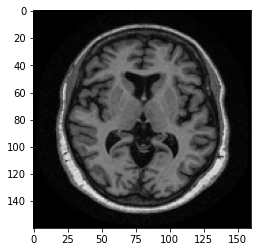

In [14]:
plt.imshow(X[1])

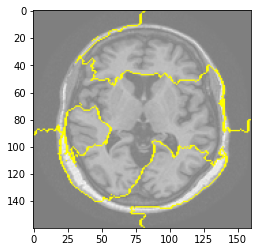

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

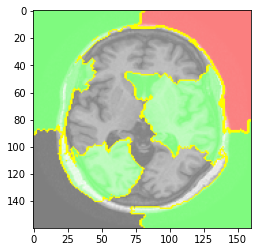

In [16]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

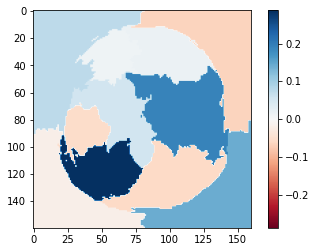

In [17]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [18]:
explanation = explainer.explain_instance(X[2].astype('double'), pred, top_labels=5, hide_color=0, num_samples=1000)

(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 

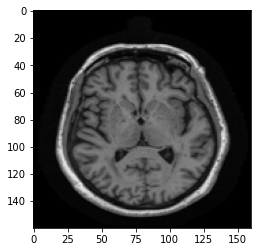

In [19]:
plt.imshow(X[2])

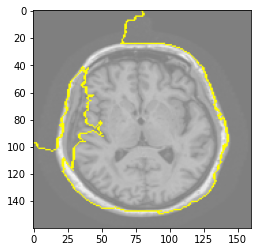

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

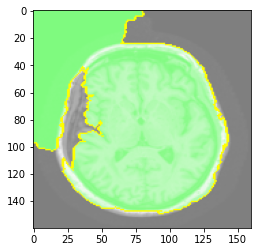

In [21]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

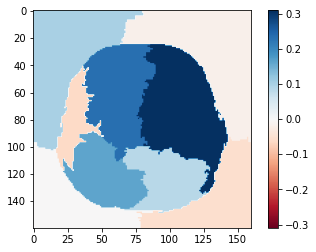

In [22]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()

In [23]:
explanation = explainer.explain_instance(X[3].astype('double'), pred, top_labels=5, hide_color=0, num_samples=1000)

(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 160)
(10, 160, 

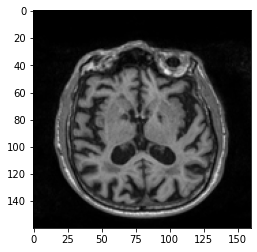

In [24]:
plt.imshow(X[3])

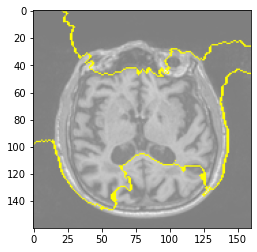

In [25]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

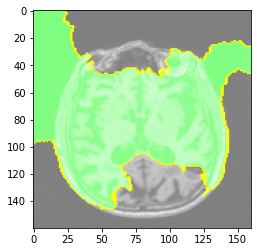

In [26]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

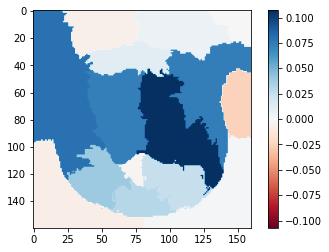

In [27]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()
plt.show()